### Doing basic classifications with Decision Trees

In [1]:
from sklearn import datasets
X, y = datasets.make_classification(n_samples=1000, n_features=3, n_redundant=0)

In [2]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [3]:
preds=dt.predict(X)#
(y==preds).mean()#也就是说分类特别准，但是预测别的怎么样呢？可能需要剪枝

1.0

### Tuning a Decision Tree model

In [4]:
X, y = datasets.make_classification(n_samples=1000, n_features=20,n_informative=3)
dt=DecisionTreeClassifier()
dt.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [5]:
dt.feature_importances_#每一个feature的重要性

array([ 0.39349366,  0.01122307,  0.07036631,  0.01266672,  0.02349252,
        0.        ,  0.28658472,  0.00902383,  0.01250672,  0.08692695,
        0.        ,  0.01126671,  0.        ,  0.        ,  0.0061877 ,
        0.00559161,  0.01060004,  0.01213814,  0.03580722,  0.01212407])

### Using many Decision Trees – random forests

In [6]:
X, y = datasets.make_classification(1000)
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [7]:
print('正确率',(y==rf.predict(X)).mean())

正确率 0.992


#### 一些方法

In [8]:
rf.criterion#split way
rf.bootstrap
rf.set_n_jobs=-1
rf.n_jobs
rf.max_features

'auto'

First, we'll look at some of the useful attributes; in this case, since we used defaults, they'll be
the object defaults:
1,rf.criterion: This is the criterion for how the splits are determined. The default is gini.
2,rf.bootstrap: A Boolean that indicates whether we used bootstrap samples when training random forest.
3,rf.n_jobs: The number of jobs to train and predict. If you want to use all the processors, set this to -1. Keep in mind that if your dataset isn't very big, it often leads to more overhead in using multiple jobs due to the data having to be serialized and moved in between processes.
4, rf.max_features: This denotes the number of features to consider when making the best split. This will come in handy during the tuning process.
5 rf.compute_importances: This helps us decide whether to compute the importance of the features. See the There's more... section of this recipe for information on how to use this.
6, rf.max_depth: This denotes how deep each tree can go.

In [9]:
probs=rf.predict_proba(X)
import pandas as pd
pro=pd.DataFrame(probs,columns=list('01'))
pro.head()                   

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.8,0.2
4,0.9,0.1


In [10]:
pro['correct']=rf.predict(X)==y
pro.head()

,0,1,correct
0,1.0,0.0,True
1,1.0,0.0,True
2,1.0,0.0,True
3,0.8,0.2,True
4,0.9,0.1,True


Populating the interactive namespace from numpy and matplotlib


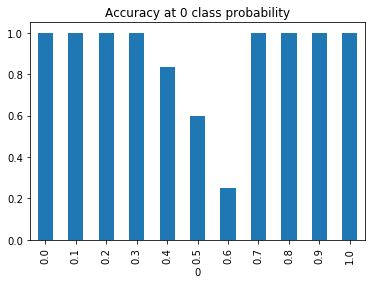

In [11]:
%pylab inline
pro.groupby('0').correct.mean().plot(kind='bar')#
plt.title("Accuracy at 0 class probability")

### 优化随机森林

In [12]:

X, y = datasets.make_classification(n_samples=10000,n_features=20, n_informative=15,
 flip_y=.5, weights=[.2, .8])

In [13]:
training = np.random.choice([True, False], p=[.8, .2],
 size=y.shape)
rf = RandomForestClassifier()
rf.fit(X[training], y[training])
preds = rf.predict(X[~training])
print("Accuracy:", (preds == y[~training]).mean())

Accuracy: 0.637991049229


In [14]:
from sklearn.metrics import confusion_matrix
max_feature_params=['auto','sqrt','log2',.01,.5,.99]

In [15]:
confusion_matrixes={}
for max_feature in max_feature_params:
    rf = RandomForestClassifier(max_features=max_feature)
    rf.fit(X[training], y[training])

    confusion_matrixes[max_feature] = confusion_matrix(y[~training],rf.predict(X[~training])).ravel()

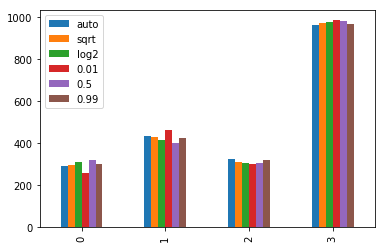

In [16]:
cdf=pd.DataFrame(confusion_matrixes)
cdf.plot(kind='bar')

### Classifying data with support vector machines

In [17]:
X, y = datasets.make_classification()
from sklearn.svm import SVC
base_svc=SVC()
base_svc.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Generalizing with multiclass classification

In [18]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [19]:
mlr=OneVsRestClassifier(LogisticRegression(),n_jobs=2)
mlr.fit(X,y)
mlr.predict(X)

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0])

### Using LDA for classification
线性判别式
In this recipe, we will do the following:
1. Grab stock data from Yahoo.
2. Rearrange it in a shape we're comfortable with.
3. Create an LDA object to fit and predict the class labels.
4. Give an example of how to use LDA for dimensionality reduction

In [23]:
tickers = ["F", "TM", "GM", "TSLA"]
from pandas_datareader import data
stock_panel =data.DataReader(tickers, "yahoo")

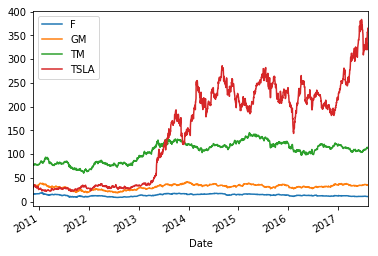

In [33]:
stock_df=stock_panel.Close.dropna()
stock_df.plot()
plt.show()

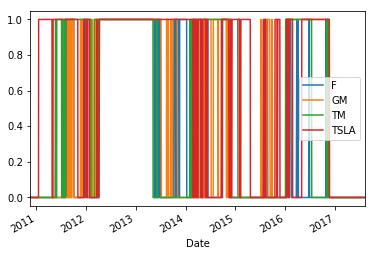

In [34]:
classes=(stock_df.shift(-180)>stock_df).astype(int)
classes.plot()

### pandas 的操作

In [35]:
X=stock_panel.to_frame()
classes=classes.unstack()
classes=classes.swaplevel(0,1).sort_index()
classes=classes.to_frame()
classes.index.names=['Date','minor']
data=X.join(classes).dropna()
data.rename(columns={0:'is_higher'},inplace=True)
data.head()

Adj Close      Close       High        Low       Open  \
Date       minor                                                          
2010-11-18 F      12.860652  16.120001  16.870001  16.049999  16.770000   
           GM     29.574911  34.189999  35.990002  33.889999  35.000000   
           TM     66.816772  77.290001  77.510002  76.830002  77.360001   
           TSLA   29.889999  29.889999  30.740000  28.920000  30.670000   
2010-11-19 F      12.988300  16.280001  16.379999  15.830000  16.020000   

                       Volume  is_higher  
Date       minor                          
2010-11-18 F      256937900.0        0.0  
           GM     457044300.0        0.0  
           TM        989100.0        0.0  
           TSLA      956100.0        0.0  
2010-11-19 F      130323600.0        0.0

In [38]:
import patsy
X = patsy.dmatrix("Open + High + Low + Close + Volume + is_higher - 1", data.reset_index(), return_type='dataframe')
X.head()

,Open,High,Low,Close,Volume,is_higher
0,16.770000,16.870001,16.049999,16.120001,256937900.0,0.0
1,35.000000,35.990002,33.889999,34.189999,457044300.0,0.0
2,77.360001,77.510002,76.830002,77.290001,989100.0,0.0
3,30.670000,30.740000,28.920000,29.889999,956100.0,0.0
4,16.020000,16.379999,15.830000,16.280001,130323600.0,0.0


In [40]:
from sklearn.lda import LDA
lda=LDA()
lda.fit(X.iloc[:,:-1],X.iloc[:,-1])

LDA(n_components=None, priors=None, shrinkage=None, solver='svd',
  store_covariance=False, tol=0.0001)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(X.ix[:, -1].values, lda.predict(X.ix[:, :-1])))

             precision    recall  f1-score   support

        0.0       0.64      0.76      0.69      3674
        1.0       0.63      0.49      0.55      3098

avg / total       0.64      0.64      0.63      6772



### Working with QDA – a nonlinear LDA 
Quadratic Discernment Analysis (QDA)

In [46]:
from sklearn.qda import QDA
qda = QDA()
qda.fit(X.ix[:, :-1], X.ix[:, -1])
predictions = qda.predict(X.ix[:, :-1])
from sklearn.metrics import classification_report
print(classification_report(X.ix[:, -1].values, predictions))

             precision    recall  f1-score   support

        0.0       0.68      0.59      0.63      3674
        1.0       0.58      0.66      0.62      3098

avg / total       0.63      0.62      0.62      6772



d:\ProgramData\Anaconda3\lib\site-packages\sklearn\qda.py:6: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)


### Using Stochastic Gradient Descent for classification
SGD
linear_model.SGDClassifier()

### Classifying documents with Naïve Bayes

In [47]:
from sklearn.datasets import fetch_20newsgroups
categories = ["rec.autos", "rec.motorcycles"]
newgroups = fetch_20newsgroups(categories=categories)

In [74]:
print('\n'.join(newgroups.data[:1]))


From: gregl@zimmer.CSUFresno.EDU (Greg Lewis)
Subject: Re: WARNING.....(please read)...
Keywords: BRICK, TRUCK, DANGER
Nntp-Posting-Host: zimmer.csufresno.edu
Organization: CSU Fresno
Lines: 33

In article <1qh336INNfl5@CS.UTK.EDU> larose@austin.cs.utk.edu (Brian LaRose) writes:
>This just a warning to EVERYBODY on the net.  Watch out for
>folks standing NEXT to the road or on overpasses.   They can
>cause SERIOUS HARM to you and your car.  
>
>(just a cliff-notes version of my story follows)
>
>10pm last night, I was travelling on the interstate here in
>knoxville,  I was taking an offramp exit to another interstate
>and my wife suddenly screamed and something LARGE hit the side
>of my truck.  We slowed down, but after looking back to see the
>vandals standing there, we drove on to the police station.
>
>She did get a good look at the guy and saw him "cock his arm" with
>something the size of a cinderblock, BUT I never saw him. We are 
>VERY lucky the truck sits up high on the road; i

In [86]:
newgroups.target.shape

(1192,)

In [78]:
dir(newgroups)

['DESCR', 'data', 'description', 'filenames', 'target', 'target_names']

In [87]:
newgroups.description

'the 20 newsgroups by date dataset'

In [82]:
len(newgroups.data)

1192

In [84]:
newgroups.filenames

array([ 'C:\\Users\\linner\\scikit_learn_data\\20news_home\\20news-bydate-train\\rec.autos\\102904',
       'C:\\Users\\linner\\scikit_learn_data\\20news_home\\20news-bydate-train\\rec.motorcycles\\103208',
       'C:\\Users\\linner\\scikit_learn_data\\20news_home\\20news-bydate-train\\rec.motorcycles\\104559',
       ...,
       'C:\\Users\\linner\\scikit_learn_data\\20news_home\\20news-bydate-train\\rec.autos\\102846',
       'C:\\Users\\linner\\scikit_learn_data\\20news_home\\20news-bydate-train\\rec.motorcycles\\104338',
       'C:\\Users\\linner\\scikit_learn_data\\20news_home\\20news-bydate-train\\rec.autos\\102790'], 
      dtype='<U96')

In [85]:
newgroups.target_names

['rec.autos', 'rec.motorcycles']

In [89]:
newgroups.target

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [88]:
newgroups.target_names[newgroups.target[0]]

'rec.autos'

In [106]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec=CountVectorizer()
bow=count_vec.fit_transform(newgroups.data)

### bow.todense()
Return a dense matrix representation of this matrix.

In [113]:
bow2 = np.array(bow.todense())
words = np.array(count_vec.get_feature_names())
words[bow2[0] > 0][:10]

array(['10pm', '1qh336innfl5', '33', '93740',
       '___________________________________________________________________',
       'action', 'after', 'all', 'always', 'am'], 
      dtype='<U79')

In [72]:
'10pm' in newgroups.data[0].lower()

True

In [115]:
from sklearn import naive_bayes
clf=naive_bayes.GaussianNB()
mask=np.random.choice([True,False],len(bow2))
clf.fit(bow2[mask],newgroups.target[mask])
pred=clf.predict(bow2[~mask])

In [117]:
np.mean(pred==newgroups.target[~mask])

0.95278246205733563

In [121]:
bow2.shape,newgroups.target[:5]

((1192, 19177), array([0, 1, 1, 0, 0], dtype=int64))

In [124]:
bow2[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Label propagation with semi-supervised learning

In [125]:
>>> from sklearn import semi_supervised
>>> lp = semi_supervised.LabelPropagation()